In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from matplotlib.ticker import FixedLocator, FixedFormatter


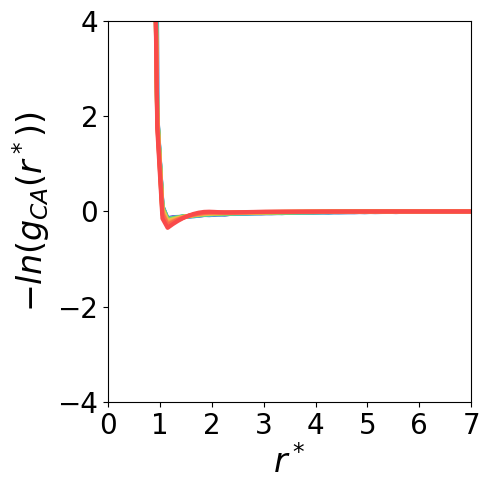

In [1]:

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "./" 
os.chdir(base_dir)

D_files = sorted(glob.glob("LD_5_WCA_gCA_avg_r-*.csv"))

r_values = [float(name.split("-")[-1].replace(".csv","")) for name in D_files]

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]

fig, ax = plt.subplots(figsize=(5,5))


ax.set_xlim(0,7)
ax.set_ylim(-4,4)
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.tick_params(axis='both', labelsize=20)

from matplotlib.ticker import NullFormatter
ax.xaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())


ax.set_xlabel(r'$r^*$', fontsize=24)
ax.set_ylabel(r'$-ln(g_{CA}(r^*))$', fontsize=24)


for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"LD_5_WCA_gCA_avg_r-{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["r*"])
    y = np.array(data["g_CA_avg"])
    yerr = data["g_CA_err"]
    y = -np.log(np.array(y) + 1e-15)

    # mask = (x >= tmin_fit) & (x <= tmax_fit)
    # time_fit = np.array(x[mask])

    # params = fit_params.iloc[i]
    # Dpp = params["Dpp"]
    # Dpp_err = params["Dpp_err"]

    ax.plot(x, y, linestyle="-", color=color, linewidth=3)
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.3)

    # fitted_data = np.full_like(time_fit, Dpp)
    # ax.plot(time_fit, fitted_data, color=color, linewidth=3, linestyle=":")
    # ax.fill_between(time_fit, fitted_data - Dpp_err, fitted_data + Dpp_err, color="black", alpha=0.2)

plt.tight_layout()
plt.show()

